# Nama : Bayu Abdurrosyid
# NIM : 2109106003
# Kelas : A1'21

# Mengimport Library

1. Library pandas untuk mengolah dataframe
2. Library matplotlib untuk menampilkan data dalam grafik
3. Library random untuk melakukan pemanggilan nilai numerik secara acak

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Mengimport Dataset ke dalam Dataframe
Dataset yang dipakai adalah rincian penjualan mobil di Norwegia dari tahun ke tahun.

In [155]:
df = pd.read_csv('/content/norway_new_car_sales_by_model.csv', encoding = 'unicode_escape')

# Menampilkan 10 data pertama pada dataframe


In [156]:
df.head(10)

,Year,Month,Make,Model,Quantity,Pct
0,2007,1,Volkswagen,Volkswagen Passat,1267,10.0
1,2007,1,Toyota,Toyota Rav4,819,6.5
2,2007,1,Toyota,Toyota Avensis,787,6.2
3,2007,1,Volkswagen,Volkswagen Golf,720,5.7
4,2007,1,Toyota,Toyota Corolla,691,5.4
5,2007,1,Peugeot,Peugeot 307,481,3.8
6,2007,1,Skoda,Skoda Octavia,481,3.8
7,2007,1,Toyota,Toyota Yaris,402,3.2
8,2007,1,Ford,Ford Focus,400,3.2
9,2007,1,Volvo,Volvo V50,346,2.7


# Grafik Pie Chart
Grafik dibawah berisi rincian mengenai Brand Mobil yang paling banyak terjual di Norwegia. Data yang diolah adalah brand mobil dan jumlah total penjualan.

In [157]:
a = df['Make'].value_counts().head(10).index.tolist()
b = list(df['Make'].value_counts().head(10))
c = df['Make'].value_counts().tail(-10).sum()
a.append('Other')
b.append(c)
dff = pd.DataFrame(list(zip(a, b)),
               columns =['Make', 'Count'])
dff

,Make,Count
0,Toyota,492
1,Volkswagen,440
2,Volvo,294
3,Ford,246
4,Nissan,180
5,Audi,146
6,Skoda,142
7,Peugeot,132
8,BMW,130
9,Mitsubishi,105


# Menampilkan data dalam pie chart

Data berikut menampilkan persentase dari total penjualan pada setiap brand mobil. Pada grafik pie chart, terlihat bahwa brand mobil toyota mendominasi penjualan di Norwegia sebesar 18.3%, diikuti Volkswagen sebesar 16.3%, Volvo sebesar 10.9%, dan seterusnya. 

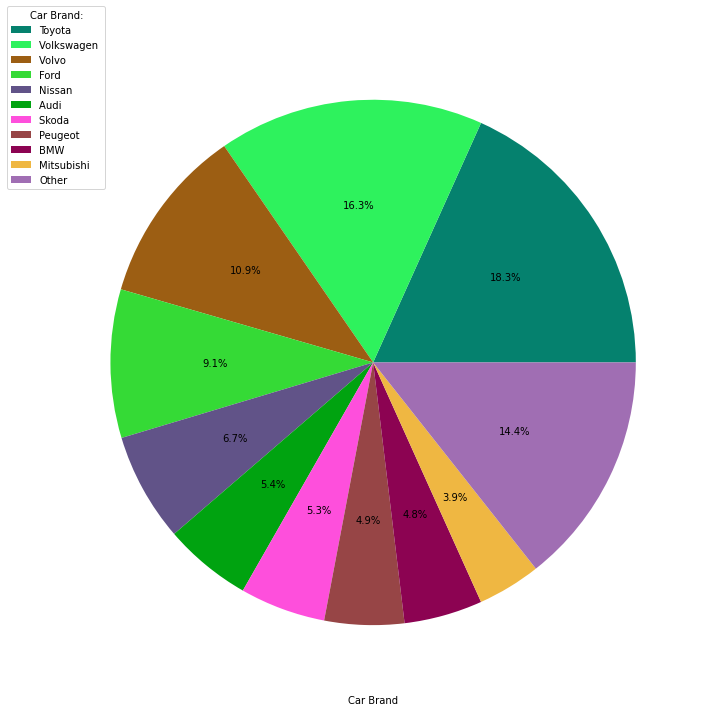

In [158]:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

n = 40
color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(n)]

plt.figure(figsize=(10, 10))
plt.pie(dff.Count, labels=dff.Make, autopct='%.1f%%', labeldistance=None, colors=color)
plt.ylabel("Total Penjualan")
plt.xlabel("Brand Mobil")
plt.legend(title = "Car Brand:", bbox_to_anchor=(0.1, 1.05))
plt.show()


# Menampilkan data ke dalam grafik bar

Sama seperti sebelumnya, grafik berikut berisi rincian penjualan mobil berdasarkan brand. Data diurutkan dari kanan ke kiri berdasarkan penjualan terbesar ke terkecil. 
Dari grafik dapat disimpulkan bahwa mobil toyota dan volkswagen menjadi merk populer di Norwegia diikuti brand lain dengan selisih yang cukup besar.

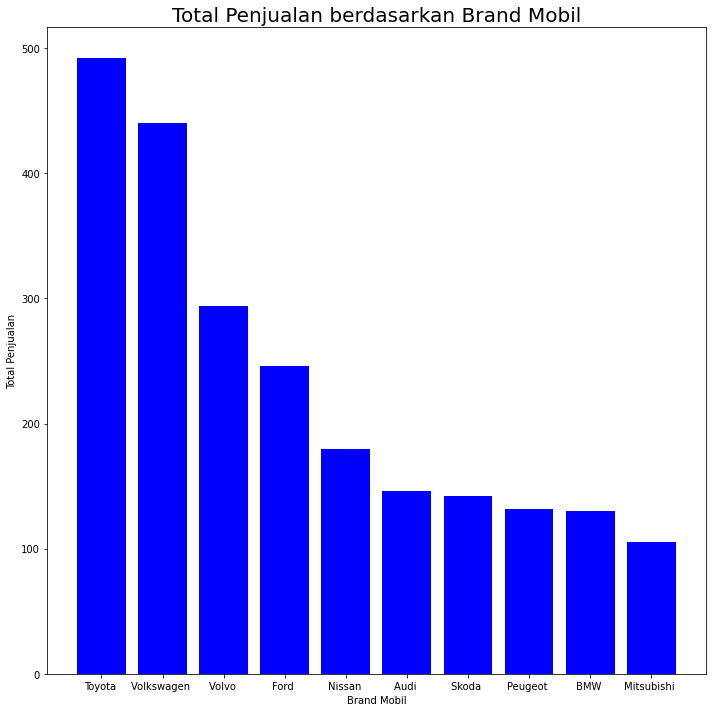

In [159]:
a = df['Make'].value_counts().head(10).index.tolist()
b = list(df['Make'].value_counts().head(10))

dfx = pd.DataFrame(list(zip(a, b)),
               columns =['Make', 'Count'])

X = list(dfx["Make"])
Y = list(dfx["Count"])

plt.figure(figsize=(10,10))
plt.title("Total Penjualan berdasarkan Brand Mobil", fontsize=20)
plt.xlabel("Brand Mobil")
plt.ylabel("Total Penjualan")
plt.bar(X,Y, color="blue")
plt.show()

# Mengolah data untuk ditampilkan ke dalam grafik line
Pada bagian berikut, data yang akan diambil adalah tahun dan total penjualan segala merk yang dijumlahkan pada tahun tersebut. 

In [160]:
aggregation_functions = {'Quantity': 'sum', 'Year': 'first'}
df_new = df.groupby(df['Year']).aggregate(aggregation_functions)
df_new.head(10)

,Quantity,Year
Year,,
2007,69749,2007
2008,57789,2008
2009,49373,2009
2010,61572,2010
2011,64009,2011
2012,66150,2012
2013,76770,2013
2014,72234,2014
2015,78947,2015


# Menampilkan data dalam grafik plot dan garis

Grafik dibawah menampilkan grafik garis dari penjualan seluruh mobil dari waktu ke waktu. Dari data dapat disimpulkan bahwa penjualan mobil sempat menurun hingga kemudian pada tahun 2009, penjualan mobil kembali meningkat di Norwegia. Hingga kemudian mengalami penurunan penjualan secara signifikan pada tahun 2017. Kemungkinan penurunan ini dikarenakan dataset yang belum lengkap untuk mencatat seluruh data di tahun 2017, sehingga total penjualan masih sedikit dibanding tahun-tahun lainnya. 
Pada dasarnya, dari grafik dapat diketahui bahwa penjualan terus meningkat seiring waktu, dikarenakan meningkatnya kemampuan ekonomi warga dan populasi di Norwegia.

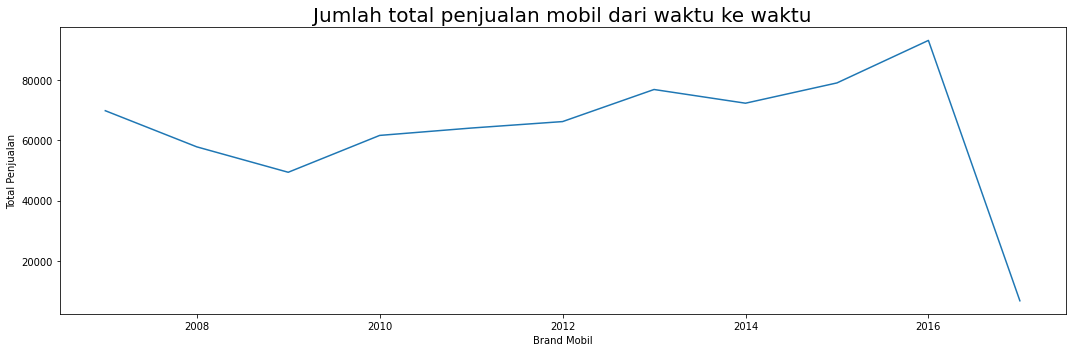

In [161]:
plt.figure(figsize=(15,5))
plt.xlabel("Tahun")
plt.ylabel("Total Penjualan Seluruh Mobil")
plt.plot(df_new['Year'], df_new['Quantity'])
plt.title('Jumlah total penjualan mobil dari waktu ke waktu', fontsize=20)
plt.show()